In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# load clean data 

df = pd.read_csv('Car.csv')

df.head()

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.sample(10)

,name,company,year,Price,kms_driven,fuel_type
58,Mahindra Quanto C8,Mahindra,2013,375000,20000,Diesel
44,Maruti Suzuki Wagon,Maruti,2013,85000,29685,Petrol
22,Mahindra Bolero DI,Mahindra,2017,180000,23452,Diesel
373,Mahindra XUV500 W6,Mahindra,2013,548900,49800,Diesel
341,BMW 5 Series,BMW,2011,1299000,49000,Diesel
246,Mahindra XUV500,Mahindra,2014,649999,47000,Diesel
337,Renault Kwid RXT,Renault,2015,270000,43000,Petrol
686,Mahindra Logan,Mahindra,2009,130000,65000,Diesel
696,Hyundai Santro Xing,Hyundai,2004,45000,137495,Petrol
583,Maruti Suzuki Wagon,Maruti,2014,130000,37458,Petrol


EDA

In [ ]:
df.shape

(719, 6)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        719 non-null    object
 1   company     719 non-null    object
 2   year        719 non-null    int64 
 3   Price       719 non-null    int64 
 4   kms_driven  719 non-null    int64 
 5   fuel_type   719 non-null    object
dtypes: int64(3), object(3)
memory usage: 33.8+ KB


In [ ]:
df.describe()

,year,Price,kms_driven
count,719.000000,7.190000e+02,719.000000
mean,2012.322670,3.908947e+05,46789.883171
std,4.134767,3.707963e+05,34633.837290
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.665000e+05,27000.000000
50%,2013.000000,2.900000e+05,42000.000000
75%,2015.000000,4.899990e+05,59000.000000
max,2019.000000,3.100000e+06,400000.000000


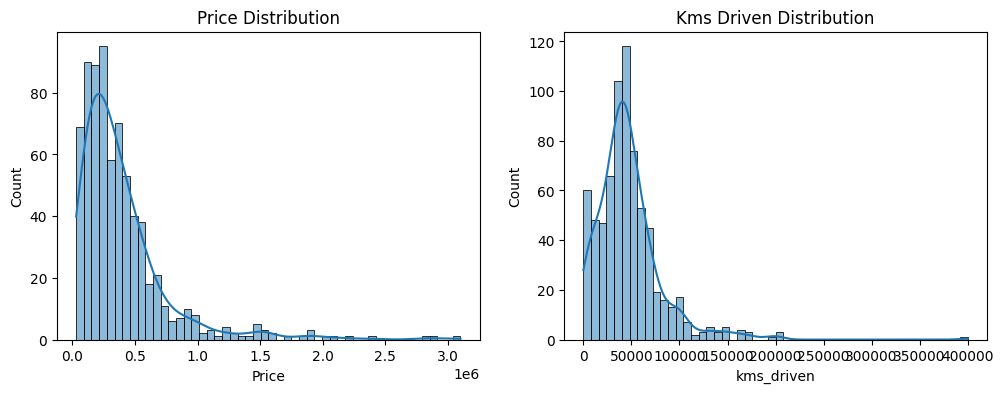

In [ ]:
# Histograms
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')

plt.subplot(1,2,2)
sns.histplot(df['kms_driven'], bins=50, kde=True)
plt.title('Kms Driven Distribution')
plt.show()


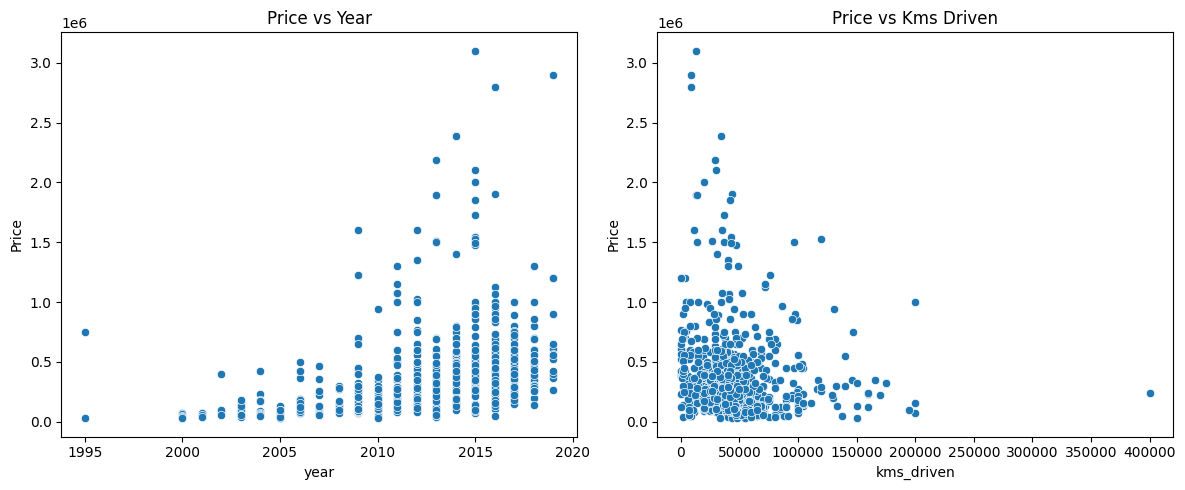

In [ ]:
# Scatter plot

plt.figure(figsize=(12,5))

# Price vs Year
plt.subplot(1,2,1) 
sns.scatterplot(x='year', y='Price', data=df)
plt.title('Price vs Year')

# Price vs Kms Driven
plt.subplot(1,2,2)
sns.scatterplot(x='kms_driven', y='Price', data=df)
plt.title('Price vs Kms Driven')

plt.tight_layout() 

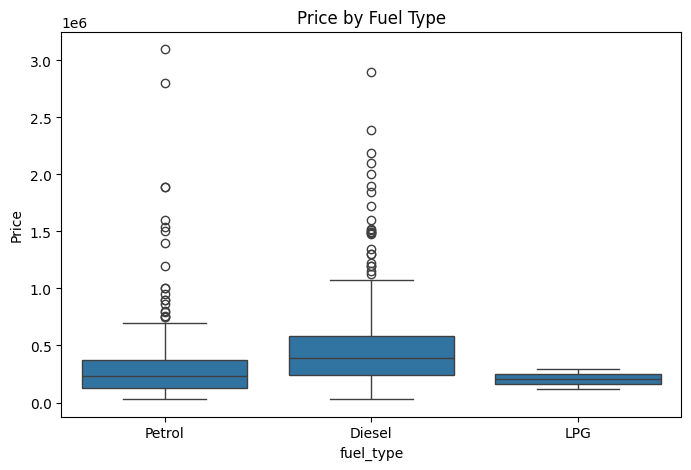

In [ ]:
# Boxplot for fuel_type
plt.figure(figsize=(8,5))
sns.boxplot(x='fuel_type', y='Price', data=df)
plt.title('Price by Fuel Type')
plt.show()

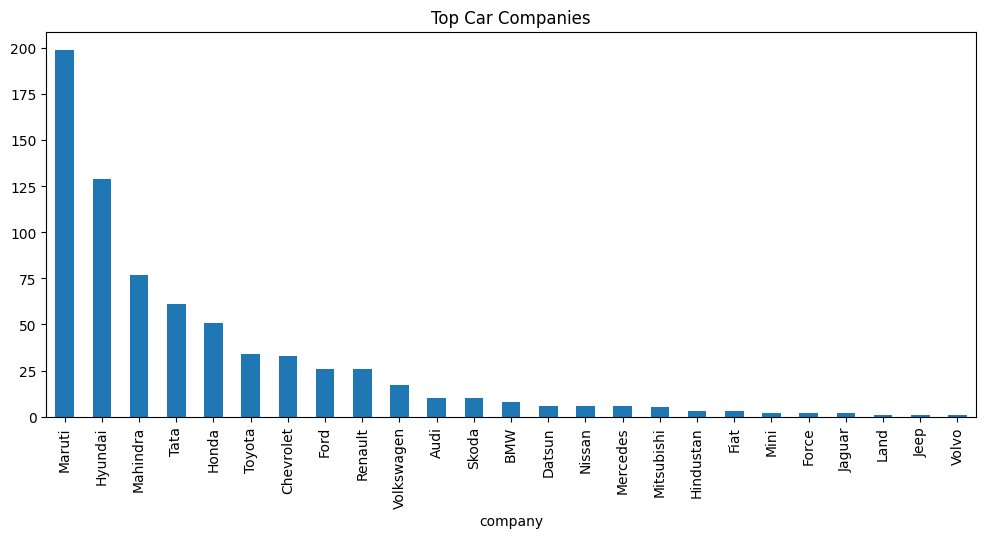

In [ ]:
# Top companies
plt.figure(figsize=(12,5))
df['company'].value_counts().plot(kind='bar')
plt.title('Top Car Companies')
plt.show()

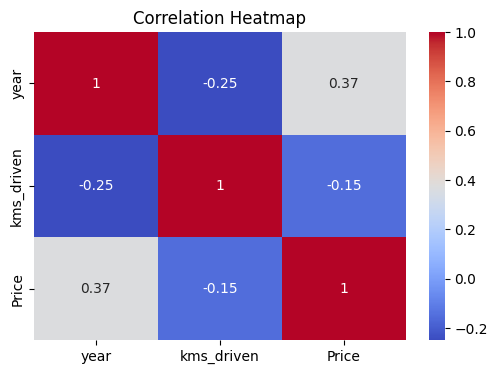

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['year','kms_driven','Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Feature engineering

In [ ]:
# log-transform target 

df['Price'] = np.log1p(df['Price'])

In [ ]:
current_year = 2025
df['car_age'] = current_year - df['year']
df.drop(columns=['year'],inplace=True)

In [ ]:
df['kms_per_year'] = df['kms_driven'] / df['car_age'].replace(0, 1)

In [ ]:
df.head()

,name,company,Price,kms_driven,fuel_type,car_age,kms_per_year
0,Hyundai Santro Xing,Hyundai,11.289794,45000,Petrol,18,2500.000000
1,Mahindra Jeep CL550,Mahindra,12.959847,40,Diesel,19,2.105263
2,Hyundai Grand i10,Hyundai,12.691584,28000,Petrol,11,2545.454545
3,Ford EcoSport Titanium,Ford,13.262127,36000,Diesel,11,3272.727273
4,Ford Figo,Ford,12.072547,41000,Diesel,13,3153.846154


In [ ]:
X = df.drop(columns=['Price'])
y = df['Price']

Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
print('X_train Shape',X_train.shape)
print('X_test Shape',X_test.shape)

X_train Shape (575, 6)
X_test Shape (144, 6)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
num_col = ['kms_driven','car_age','kms_per_year']
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

Pipelines

In [ ]:
num_pipeline = Pipeline(steps=[
    ('power',PowerTransformer(method='yeo-johnson')),
    ('scaler',StandardScaler())

])

In [ ]:
cat_pipeline = Pipeline(steps=[
    ('encoder',OneHotEncoder(drop='first',handle_unknown='ignore'))
])

Preprocessor

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_pipeline,num_col),
    ('cat',cat_pipeline,cat_col)
],remainder='passthrough', force_int_remainder_cols=False)

Final Pipeline

In [ ]:
model = Pipeline(steps=[
    ('preprocessing',preprocessor),
    ('regressor',LinearRegression())
])

Train Model

In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['kms_driven', 'car_age',
                                                   'kms_per_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('regressor', LinearRegression())])

Evaluation

In [ ]:
y_pred = model.predict(X_test)

c:\Users\sudai\miniconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
print("Test R²:", r2_score(y_test, y_pred))

Test R²: 0.762821819345483


Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate

cv_scores = cross_validate(model,X_train,y_train,cv=5,scoring='r2')

c:\Users\sudai\miniconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\sudai\miniconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\sudai\miniconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\sudai\miniconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\sudai\miniconda3\e

In [ ]:
print("CV Mean R²:", cv_scores['test_score'].mean())

CV Mean R²: 0.7026121431545471


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

Parameter Grid

In [ ]:
param_grid = {
    'regressor__n_estimators' : [100,200,300,400,500],
    'regressor__max_depth' : [None, 10, 20, 30, 40],
    'regressor__min_samples_split' : [2, 5, 10],
    'regressor__min_samples_leaf' : [1, 2, 4],
    'regressor__max_features' : [None, 'sqrt', 'log2']
}

Pipeline with Random Forest

In [ ]:
rf_model = Pipeline(steps=[
    ('preprocessing',preprocessor),
    ('regressor',RandomForestRegressor(random_state=42))
])

Randomized Search

In [ ]:
random_search = RandomizedSearchCV(rf_model,
                                   param_distributions=param_grid,
                                   n_iter=20,
                                   cv=5,
                                   scoring='r2',
                                   random_state=42,
                                   n_jobs= -1)

In [ ]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(force_int_remainder_cols=False,
                                                                remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('power',
                                                                                                PowerTransformer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['kms_driven',
                                                                                'car_age',
                                                                                'kms_per_year']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unkno...
                                                                                'fuel_type'])])),
                                             ('regressor',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'regressor__max_depth': [None, 10, 20,
                                                                 30, 40],
                                        'regressor__max_features': [None,
                                                                    'sqrt',
                                                                    'log2'],
                                        'regressor__min_samples_leaf': [1, 2,
                                                                        4],
                                        'regressor__min_samples_split': [2, 5,
                                                                         10],
                                        'regressor__n_estimators': [100, 200,
                                                                    300, 400,
                                                                    500]},
                   random_state=42, scoring='r2')

In [ ]:
random_search.best_params_

{'regressor__n_estimators': 100,
 'regressor__min_samples_split': 2,
 'regressor__min_samples_leaf': 1,
 'regressor__max_features': 'log2',
 'regressor__max_depth': None}

In [ ]:
random_search.best_score_

0.6513540271637185

In [ ]:
best_rf_model = random_search.best_estimator_
rf_y_pred = best_rf_model.predict(X_test)

c:\Users\sudai\miniconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
print("Random Forest Test R²:", r2_score(y_test, rf_y_pred))

Random Forest Test R²: 0.7169552053021903


Deeper Hyperparameters

In [ ]:
deep_param_grid = { 
                    'regressor__n_estimators': [200, 500, 800, 1000],
                    'regressor__max_depth': [None, 20, 40, 60, 80, 100],
                    'regressor__min_samples_split': [2, 5, 10, 20],
                    'regressor__min_samples_leaf': [1, 2, 4, 8],
                    'regressor__max_features': [None, 'sqrt', 'log2', 0.5],
                    'regressor__bootstrap': [True, False]
                    }

In [ ]:
rf_model_deep = Pipeline(steps=[
                                ('preprocessing', preprocessor),
                                ('regressor', RandomForestRegressor(random_state=42))
                                ])

In [ ]:
deep_random_search = RandomizedSearchCV(rf_model_deep,
                                   param_distributions=deep_param_grid,
                                   n_iter=50,
                                   cv=5,
                                   scoring='r2',
                                   random_state=42,
                                   n_jobs= -1)

In [ ]:
deep_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(force_int_remainder_cols=False,
                                                                remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('power',
                                                                                                PowerTransformer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['kms_driven',
                                                                                'car_age',
                                                                                'kms_per_year']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unkno...
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'regressor__bootstrap': [True, False],
                                        'regressor__max_depth': [None, 20, 40,
                                                                 60, 80, 100],
                                        'regressor__max_features': [None,
                                                                    'sqrt',
                                                                    'log2',
                                                                    0.5],
                                        'regressor__min_samples_leaf': [1, 2, 4,
                                                                        8],
                                        'regressor__min_samples_split': [2, 5,
                                                                         10,
                                                                         20],
                                        'regressor__n_estimators': [200, 500,
                                                                    800,
                                                                    1000]},
                   random_state=42, scoring='r2')

In [ ]:
print("Best Parameters (Deep Search):", deep_random_search.best_params_)
print("Best CV R² (Deep Search):", deep_random_search.best_score_)

Best Parameters (Deep Search): {'regressor__n_estimators': 800, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 40, 'regressor__bootstrap': False}
Best CV R² (Deep Search): 0.6675989578320306


In [ ]:
best_rf_model_deep = deep_random_search.best_estimator_
rf_y_pred_deep = best_rf_model_deep.predict(X_test)
print("Random Forest Test R² (Deep Search):", r2_score(y_test, rf_y_pred_deep))

c:\Users\sudai\miniconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Random Forest Test R² (Deep Search): 0.7237704151063529


Save the trained pipeline

In [ ]:
import pickle

In [ ]:
pickle.dump(best_rf_model_deep,open('model.pkl','wb'))